# Create Training Dataset

## Group Information
Team Name:
<br>Participants:

## 0. Introduction to Creating a Training Dataset
In this module, we will generate a training dataset based on the kNN algorithm and generate the corresponding feature lib.  
  
First we will get an image containing 50x100 handwritten digits. We need to extract these 5000 numbers and generate a feature library for the kNN algorithm. At the same time, we will also extract 2500 of these 5000 digits as the test dataset to test our model.  
  
OpenCV is a powerful visualization library, it provides some functions to help us achieve these. We will implement these functions by calling `cv2.func()`.  

kNN is short for k-Nearest Neighbors. It finds a set of k objects in the training set that are closest to the test object, and then assigns a corresponding label to the test object according to the label with highest frequency among the k objects.

## 1. Initialize the Environment
First let's initialize our environment. This step includes importing modules and getting project path.

In [41]:
# number detected related
import cv2
import os
import numpy as np
import math
from lib import imshow
import random
from my_function import image_split_row, image_split_column

# get the project path
PRJ_PATH = os.getcwd()
# OPENCV_data.npz
TRAIN_DATA_NAME = "OPENCV_data.npz"

## 2. Generate the Training Dataset
We now need to generate a training dataset for handwritten digits recognition. We will do it step by step.

### Preprocess the Image
Read in the *digits.png* which is in the *DigitsLib* and change it to a gray one. 
  
  
The *digits.png* has (50x100) numbers, and each number has (20x20) pixels.  
Load *digits.png* with `img = cv2.imread(filename)`

In [42]:
img = cv2.imread('DigitsLib/digits.png')

If loaded correctly, you would see the shape of the `img` and its content by running the cell below.

(1000, 2000, 3)


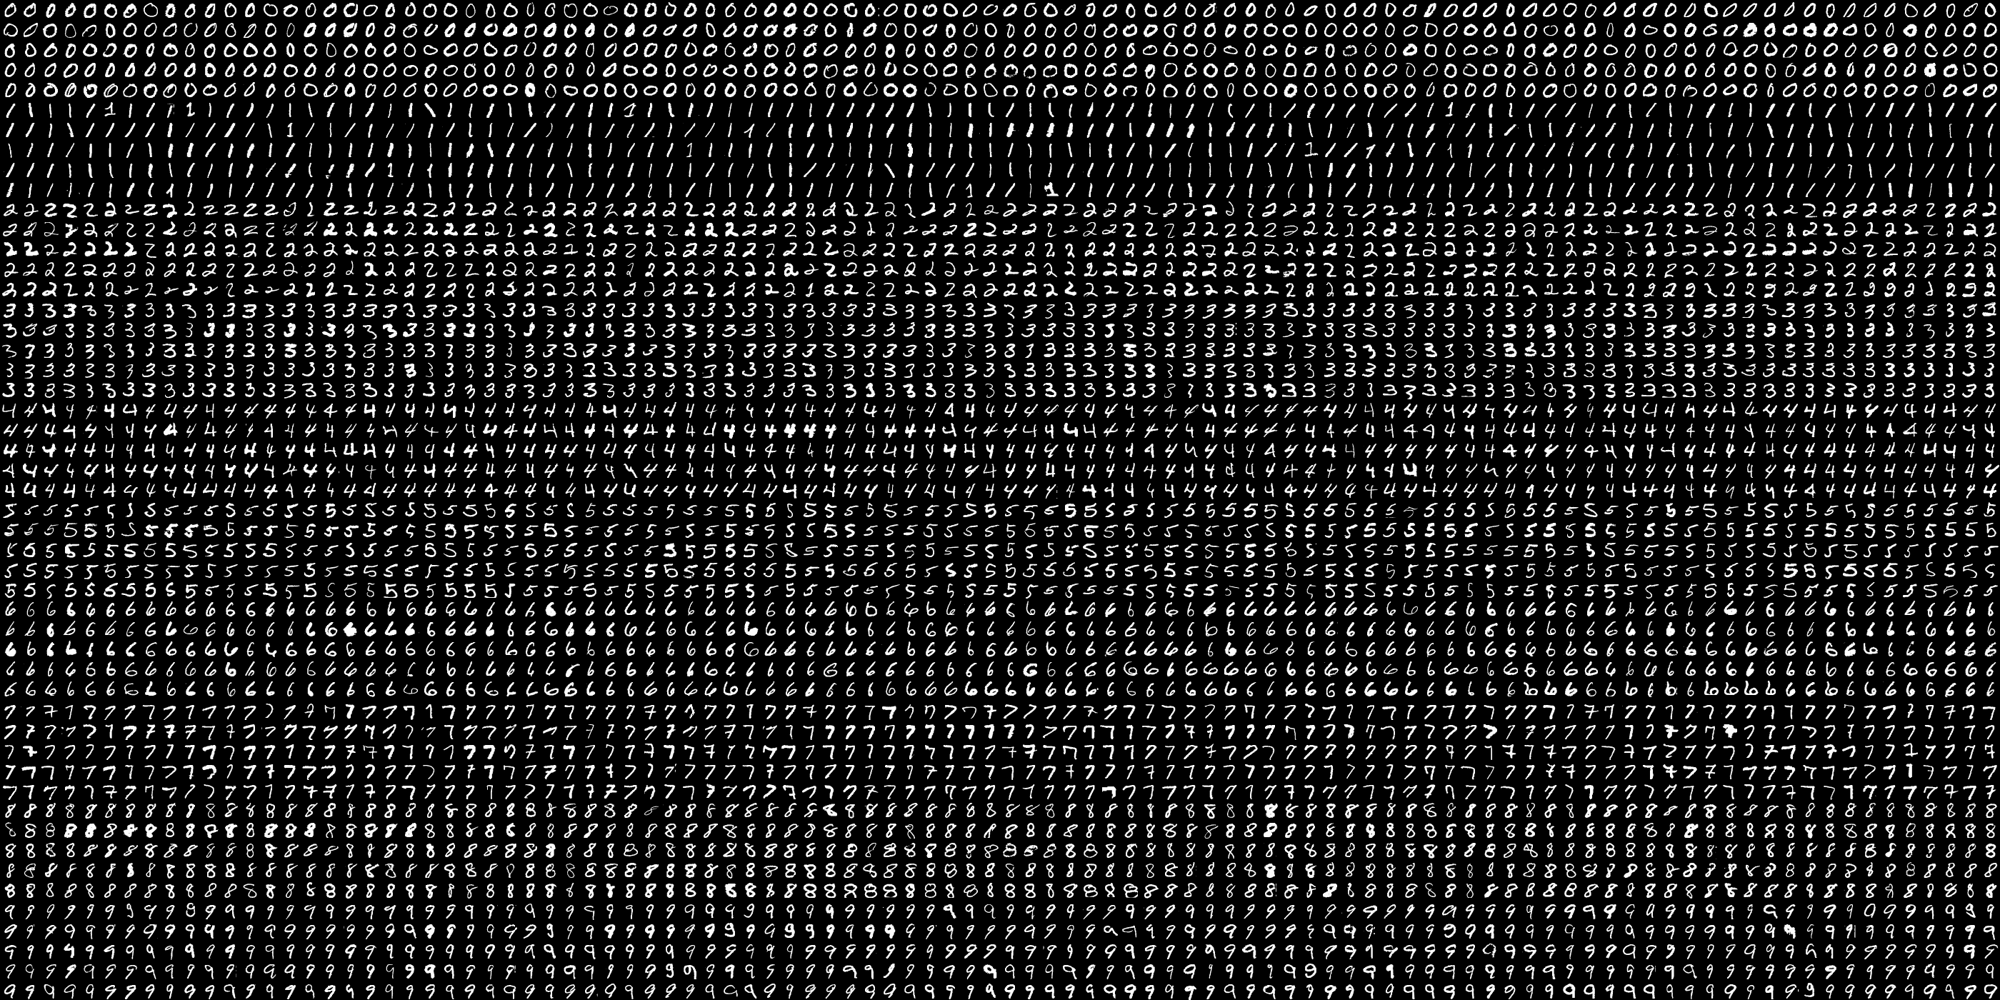

In [8]:
print(img.shape)
imshow(img)

Now let's convert the image into a grayscale one with: `grayImg = cv2.cvtColor(src,code)` 
<br>**src**: Image to be converted.
<br>**code**: Color gamut before and after conversion. It can be `cv2.COLOR_BGR2GRAY`, `
cv2.COLOR_BGR2RGB`,`cv2.COLOR_BGR2HSV`. Choose the one you need.

note: the given *digits.png* is a colorful one, convert it to a **grayscale** image, not a ~binary~ image.

In [9]:
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### Split the Image
Now we are going to split this images into small cells, each cell only contains only one digit. We will use `np.hsplit(arr, indices_or_sections)` for horizontal segmentation, and  use `np.vsplit(arr, indices_or_sections)` for vertical segmentation.
<br>**arr**: *Array to be divided into sub-arrays.*
<br>**indices_or_sections**: *an integer N, the array will be divided into N equal array along axis.*
<br>**Return**: *A list of sub-arrays.*

In this step, we will get a two-dimensional list `cells` whose size is (50, 100, 20, 20). That means the list contains 50 rows and 100 columns of digits, and the size of each digit is 20x20 pixels. 


Complete following cell below to split the grayscale image we get in the last step.

In [10]:
cells = np.vsplit(grayImg,50)
cells=[np.hsplit(i,100) for i in cells]


Run the following cell to check the split result.

In [34]:
cells = np.array(cells)
print(cells.shape)
for cell in [(i, j) for i in range(50) for j in range(100)]:
    
    _threshold, imgBin = cv2.threshold(cells[cell],0,255,cv2.THRESH_BINARY+cv2.THRESH)
        a,rstartList,rendList=(image_split_row(imgBin))
        
        cells[cell]=cv2.resize(cells[cell][rstartList[0]:rendList[0],:],(20,20))
    imshow(cells[cell])

(50, 100, 20, 20)


### Generate the Dataset
Now we are ready to create the training dataset and the testing dataset.  

In the previous step, we have already get `cells` with the shape (50,100,20,20). To generate the dataset, we neet to convert each digit in `cells` from a 20x20 array to a 1x400 array. Use `array.reshape(newshape).astype(np.float32)` to achieve it.  

- Use all the numbers in *digits.png* as the training data set, and assign these reshaped numbers to `train`.
- Use the numbers in the right half of *digits.png*  as the testing dataset, and assign these reshaped numbers to `test`. That means use the digits from column 51 to column 100 in *digits.png* as the testing dataset. 

Note: training dataset doesn't contain testing dataset in formal maching learning tasks. We are doing so here only for demonstration purpose.

In [26]:

train = cells.reshape(5000,400).astype(np.float32)
print(f"Shape of the training set: {train.shape}")

#Testing set
test =cells[:,50:] .reshape(2500,400).astype(np.float32)
print(f"Shape, of the testing set: {test.shape}")

Shape of the training set: (5000, 400)
Shape, of the testing set: (2500, 400)


After we get the training dataset with 5000 rows, wee need to tell the machine the actual number each row represents so that the machine can start learning. This is called *label*ing the data. And this is what we are going to do next.  

In the *digits.png*, we can see the pattern that each 5 row chunks have the same digit. Based on this pattern, we will create the labels for the dataset. 

The code for labeling testing set is given. Now finish the code for the training set.

In [35]:
k = np.arange(10) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Training set
train_labels = np.repeat(k,5 * 100)[:,np.newaxis]
print(train_labels.shape)
# Testing set
test_labels = np.repeat(k,5 * 50)[:,np.newaxis]


(5000, 1)


### Training
With all the data and labels set, we can now start training our module.

First, Create a KNN object with `knn = cv2.ml.KNearest_create()`

In [36]:
knn = cv2.ml.KNearest_create()


Then let's start training with `knn.train( samples, layout, responses)`!
<br>**samples**: Training samples.
<br>**layout**: Sample type. It can be `cv2.ml.ROW_SAMPLE`, which means each training sample is a row of samples), or `cv2.ml.COL_SAMPLE` which means each training sample is a column of samples. 
<br>**responses**: Vector of responses associated with the training samples.

In [37]:

    knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)


True

## 3. Testing

After training, let's do some test with testing dataset, use `knn.findNearest( samples, k)` to do the recognization.
<br>**samples**: Input samples.
<br>**k**: Number of used nearest neighbors. It should be greater than or equal to 1.

In [38]:
_, result, _, _ = knn.findNearest(test,5)

Run the cell below to calculate the accuracy.

In [39]:
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct/result.size
print(f"{accuracy * 100: 0.02f}%")

 87.52%


If we are doing random guesses, the accuracy should be around 10%. This is a pretty impressing result!

## 4. Save the Training Dataset
If everything is ok, let's save the tarining Dataset and the corresponding labels for future use.

In [40]:
fileName = os.path.join(PRJ_PATH, "TrainingData", TRAIN_DATA_NAME)
np.savez(fileName, train = train, train_labels = train_labels)